In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("yield_curve_data.csv", index_col = 0)
df.head()

,DGS3MO,DGS2,DGS10,T10Y2Y
DATE,,,,
1981-09-01,17.01,16.78,15.41,-1.37
1981-09-02,16.65,16.78,15.40,-1.38
1981-09-03,16.96,16.90,15.48,-1.42
1981-09-04,16.64,16.89,15.51,-1.38
1981-09-08,16.54,16.95,15.59,-1.36


In [3]:
df["test"] = df["DGS10"] - df["DGS2"]
df.head()

,DGS3MO,DGS2,DGS10,T10Y2Y,test
DATE,,,,,
1981-09-01,17.01,16.78,15.41,-1.37,-1.37
1981-09-02,16.65,16.78,15.40,-1.38,-1.38
1981-09-03,16.96,16.90,15.48,-1.42,-1.42
1981-09-04,16.64,16.89,15.51,-1.38,-1.38
1981-09-08,16.54,16.95,15.59,-1.36,-1.36


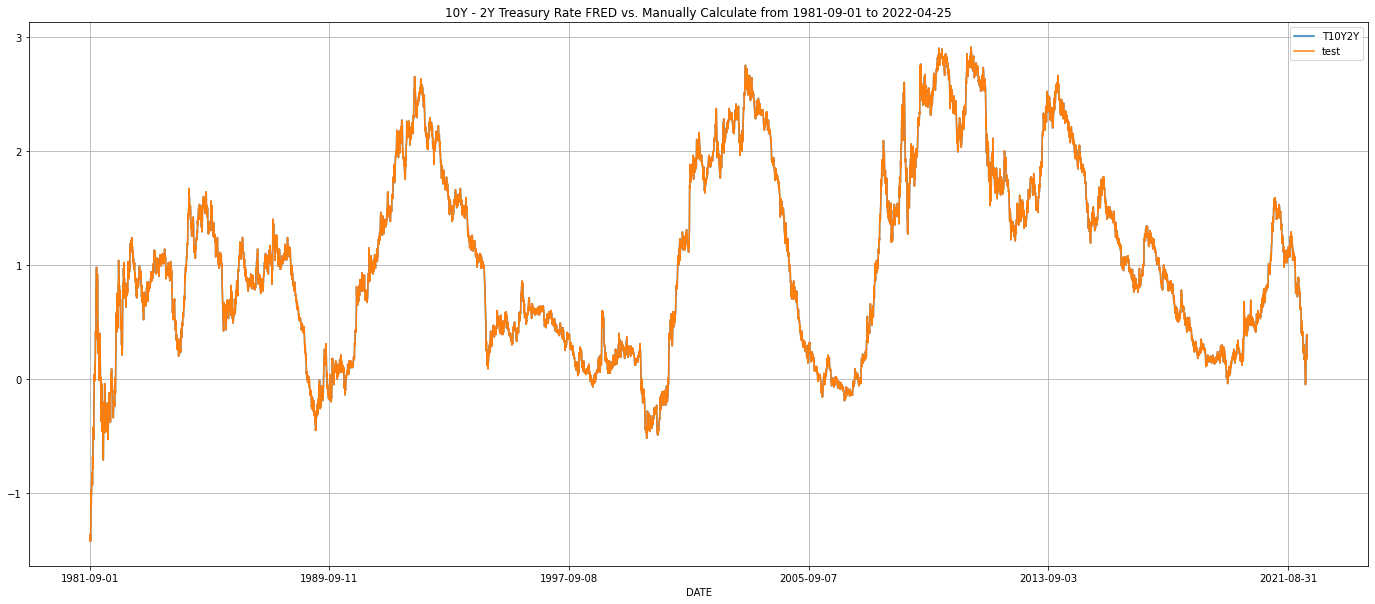

In [5]:
df[["T10Y2Y", "test"]].plot(figsize = (24,10))
plt.grid()
plt.title("10Y - 2Y Treasury Rate FRED vs. Manually Calculate from {} to {}".format(df.index[0], df.index[len(df) - 1]))
plt.show()

In [7]:
#let's rename the columns
df = pd.read_csv("yield_curve_data.csv", index_col = 0)
columns = ["3MONTH", "2YEAR", "10YEAR", "10YEAR-2YEAR"]
df.columns = columns
df.head()

,3MONTH,2YEAR,10YEAR,10YEAR-2YEAR
DATE,,,,
1981-09-01,17.01,16.78,15.41,-1.37
1981-09-02,16.65,16.78,15.40,-1.38
1981-09-03,16.96,16.90,15.48,-1.42
1981-09-04,16.64,16.89,15.51,-1.38
1981-09-08,16.54,16.95,15.59,-1.36


In [8]:
#let's find the new one
df["10YEAR-3MONTH"] = df["10YEAR"] - df["3MONTH"]
df.head()

,3MONTH,2YEAR,10YEAR,10YEAR-2YEAR,10YEAR-3MONTH
DATE,,,,,
1981-09-01,17.01,16.78,15.41,-1.37,-1.60
1981-09-02,16.65,16.78,15.40,-1.38,-1.25
1981-09-03,16.96,16.90,15.48,-1.42,-1.48
1981-09-04,16.64,16.89,15.51,-1.38,-1.13
1981-09-08,16.54,16.95,15.59,-1.36,-0.95


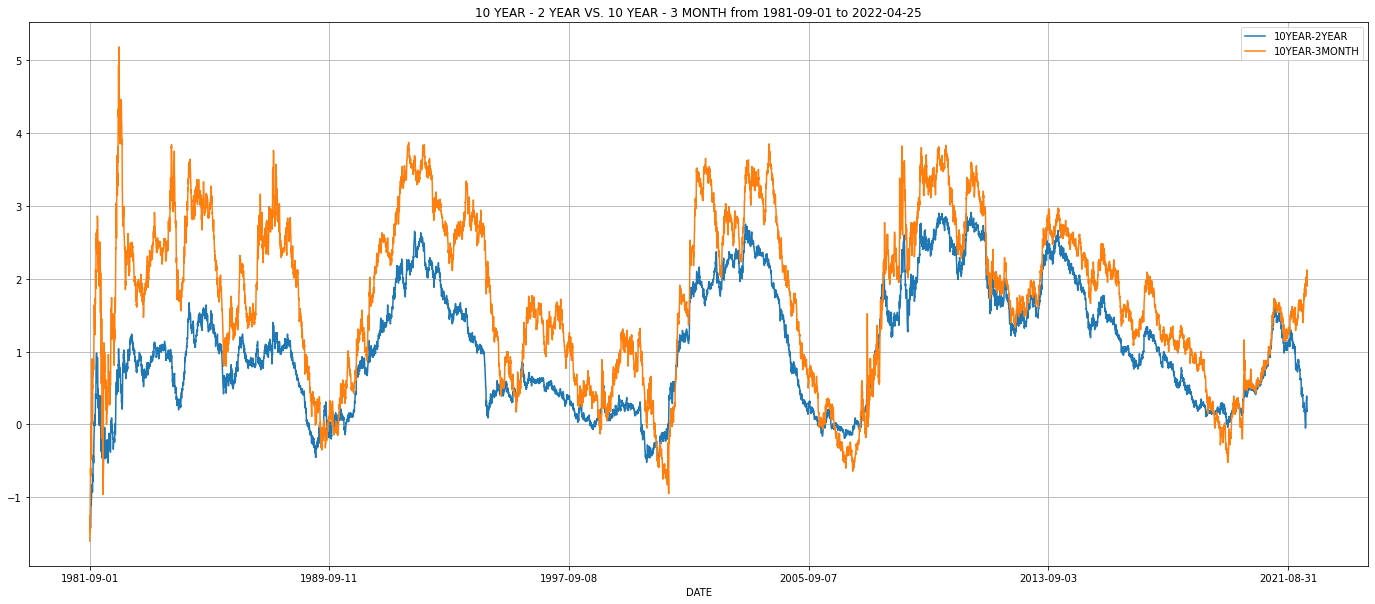

In [9]:
df[["10YEAR-2YEAR", "10YEAR-3MONTH"]].plot(figsize = (24,10))
plt.grid()
plt.title("10 YEAR - 2 YEAR VS. 10 YEAR - 3 MONTH from {} to {}".format(df.index[0], df.index[len(df) - 1]))
plt.show()

In [12]:
#define window sizes
window_sizes = [1, 5, 30, 100, 252, 365]

for i in window_sizes:
    df["{}_day_correlation".format(i)] = df["10YEAR-2YEAR"].rolling(window = i).corr(df["10YEAR-3MONTH"])
    
df.head()

,3MONTH,2YEAR,10YEAR,10YEAR-2YEAR,10YEAR-3MONTH,1_day_correlation,5_day_correlation,30_day_correlation,100_day_correlation,252_day_correlation,365_day_correlation
DATE,,,,,,,,,,,
1981-09-01,17.01,16.78,15.41,-1.37,-1.60,NaN,NaN,NaN,NaN,NaN,NaN
1981-09-02,16.65,16.78,15.40,-1.38,-1.25,NaN,NaN,NaN,NaN,NaN,NaN
1981-09-03,16.96,16.90,15.48,-1.42,-1.48,NaN,NaN,NaN,NaN,NaN,NaN
1981-09-04,16.64,16.89,15.51,-1.38,-1.13,NaN,NaN,NaN,NaN,NaN,NaN
1981-09-08,16.54,16.95,15.59,-1.36,-0.95,NaN,0.476099,NaN,NaN,NaN,NaN


array([<AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>,
       <AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>,
       <AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>],
      dtype=object)

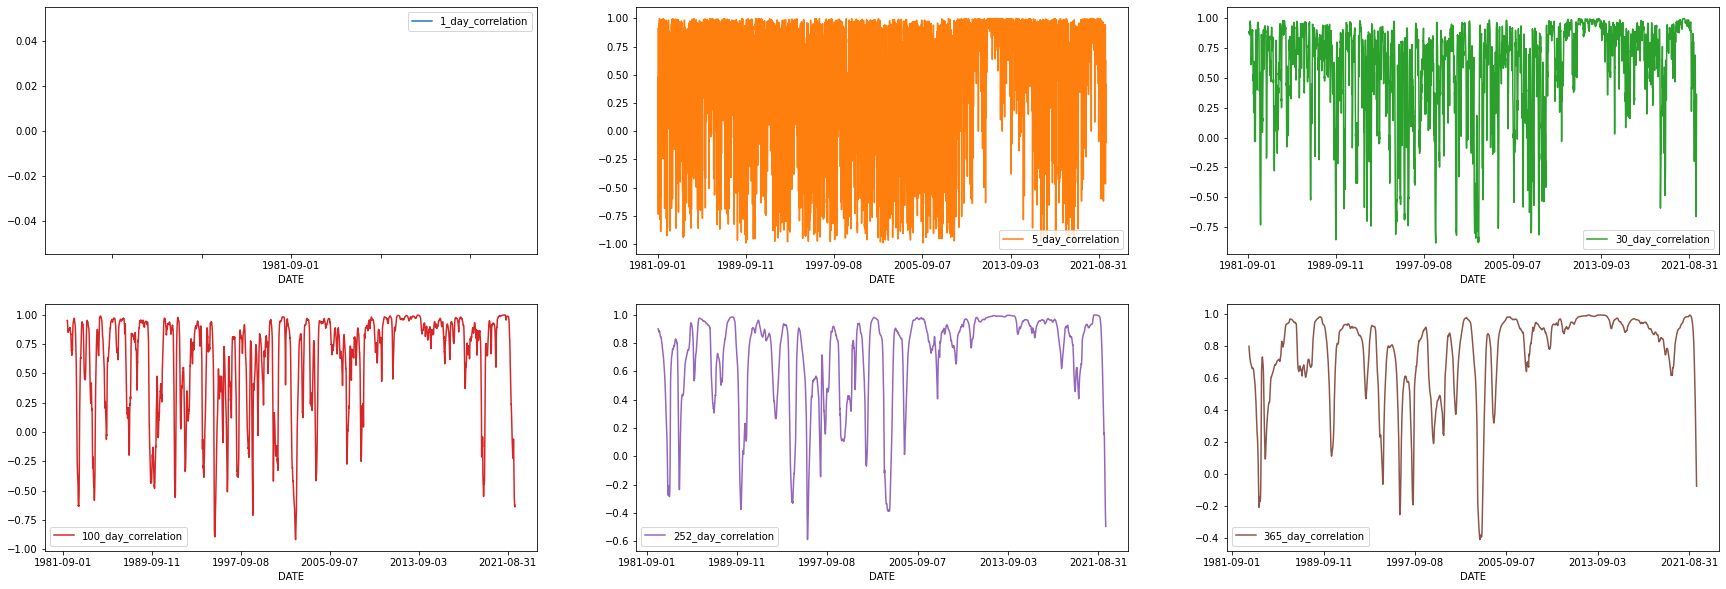

In [31]:
fig, axes = plt.subplots(2, 3, figsize = (30,10))
df[["1_day_correlation", "5_day_correlation", "30_day_correlation", "100_day_correlation", "252_day_correlation", "365_day_correlation"]].plot(ax = axes, subplots = True)